In [1]:
using Bloqade
using Distributions
using LegendrePolynomials
using PythonCall
using LinearAlgebra
using Printf

include("../src/BloqadeControl.jl")
using .BloqadeControl

In [2]:
# Specify parametrization of waveforms
n_sites = 2
basis = "legendre"
n_basis = 10
use_sigmoid_envolope = true
tf = 1.0
F0 = [(x)->0.,(x)->0.]

# Specify training parameters
params = 2. * rand(Float64, (2, n_basis)) .- 1.
lr = 5e-2
w_l2 = 1e-3
n_iter = 500
method = "adam"

# Specify parameters of Rydberg atoms
distance = 5.95
atoms = generate_sites(ChainLattice(), n_sites, scale=distance);
local_detuning = [-1, 1]
global_detuning = 0.0
n_samples = 20

# Specify target state
#target_state = arrayreg(bit"11") ## all-one state
#target_state = uniform_state(n_sites) ## uniform superposition state
bell_state_vec = Array{ComplexF64}([1, 0, 0, 1]./sqrt(2))
target_state = ArrayReg(bell_state_vec; nlevel=2)
J = UniformScaling(1.)
tar_op = density_matrix(target_state).state
M = J - tar_op;
M = GeneralMatrixBlock(M; nlevel=2);

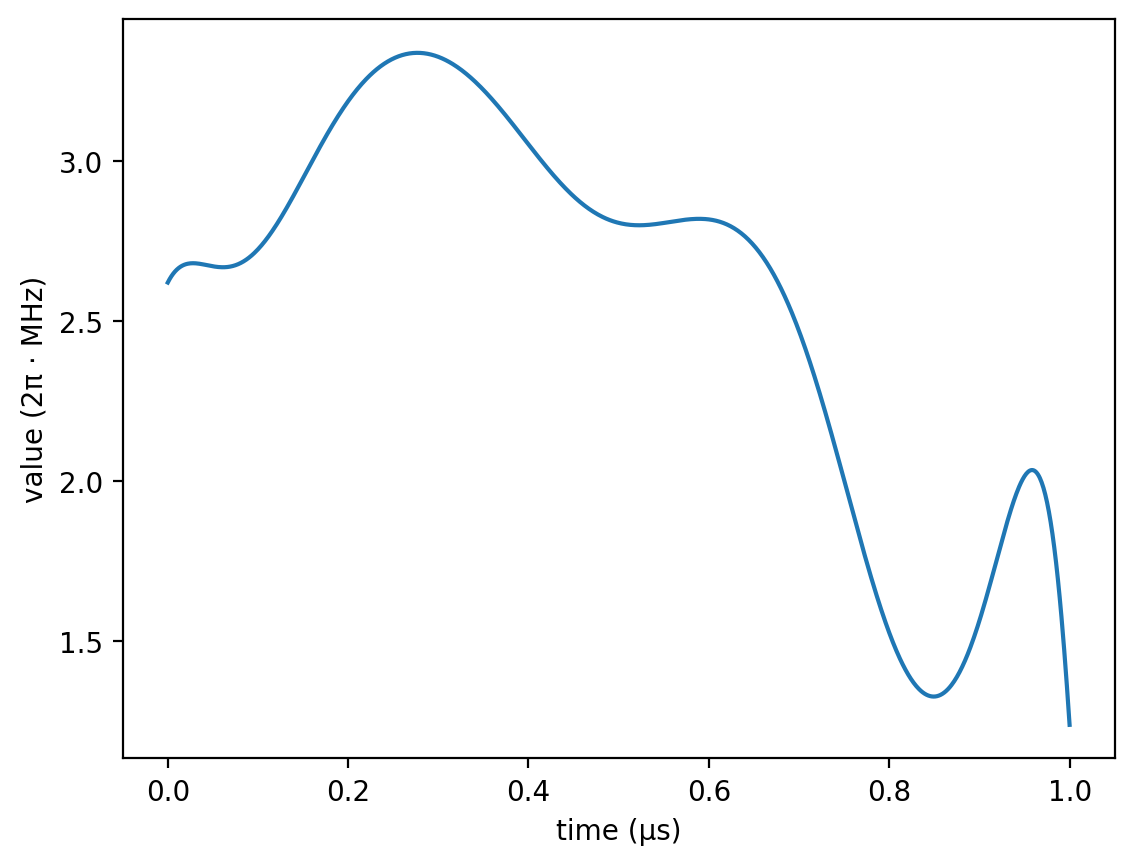

In [3]:
# Setup optimizer
generator = WaveformGenerator(n_sites, basis, n_basis, use_sigmoid_envolope, F0, tf)
model = BloqadeModel(atoms, local_detuning, global_detuning, n_samples, M);
optim = Optimizer(params, lr, w_l2, n_iter, method)

# Plot waveforms
update_waveform!(model, generator, optim.params)
Bloqade.plot(generator.Ω1)
#Bloqade.plot(generator.Δ1[1])

In [4]:
# Start training
update_waveform!(model, generator, optim.params)
@printf "Current loss function value is %.3f.\n" compute_loss(model, generator, optim)

train_loss!(model, generator, optim)

Current loss function value is 0.530.
epoch: 10, loss = 0.5286, loss_l2 = 0.000121
epoch: 20, loss = 0.5123, loss_l2 = 0.000125
epoch: 30, loss = 0.5006, loss_l2 = 0.000138
epoch: 40, loss = 0.4962, loss_l2 = 0.000157
epoch: 50, loss = 0.4847, loss_l2 = 0.000175
epoch: 60, loss = 0.4825, loss_l2 = 0.000181
epoch: 70, loss = 0.4721, loss_l2 = 0.000200
epoch: 80, loss = 0.4616, loss_l2 = 0.000240
epoch: 90, loss = 0.4250, loss_l2 = 0.000310
epoch: 100, loss = 0.3609, loss_l2 = 0.000429
epoch: 110, loss = 0.3165, loss_l2 = 0.000546
epoch: 120, loss = 0.2791, loss_l2 = 0.000654
epoch: 130, loss = 0.2039, loss_l2 = 0.000841
epoch: 140, loss = 0.2176, loss_l2 = 0.001033
epoch: 150, loss = 0.1540, loss_l2 = 0.001231
epoch: 160, loss = 0.1572, loss_l2 = 0.001328
epoch: 170, loss = 0.1027, loss_l2 = 0.001434
epoch: 180, loss = 0.0795, loss_l2 = 0.001510
epoch: 190, loss = 0.0677, loss_l2 = 0.001584
epoch: 200, loss = 0.0650, loss_l2 = 0.001636
epoch: 210, loss = 0.0842, loss_l2 = 0.001673
epoch

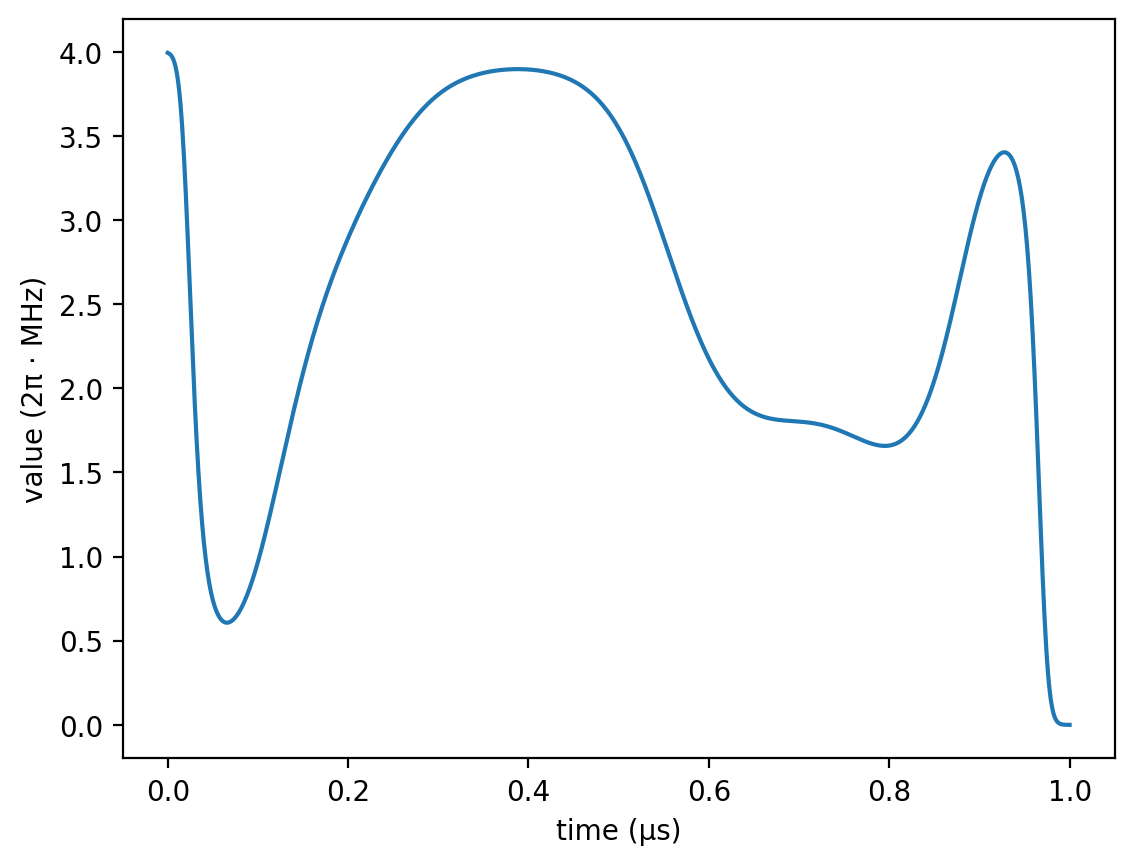

In [5]:
# Final pulse visualization
update_waveform!(model, generator, optim.params)
Bloqade.plot(generator.Ω1)

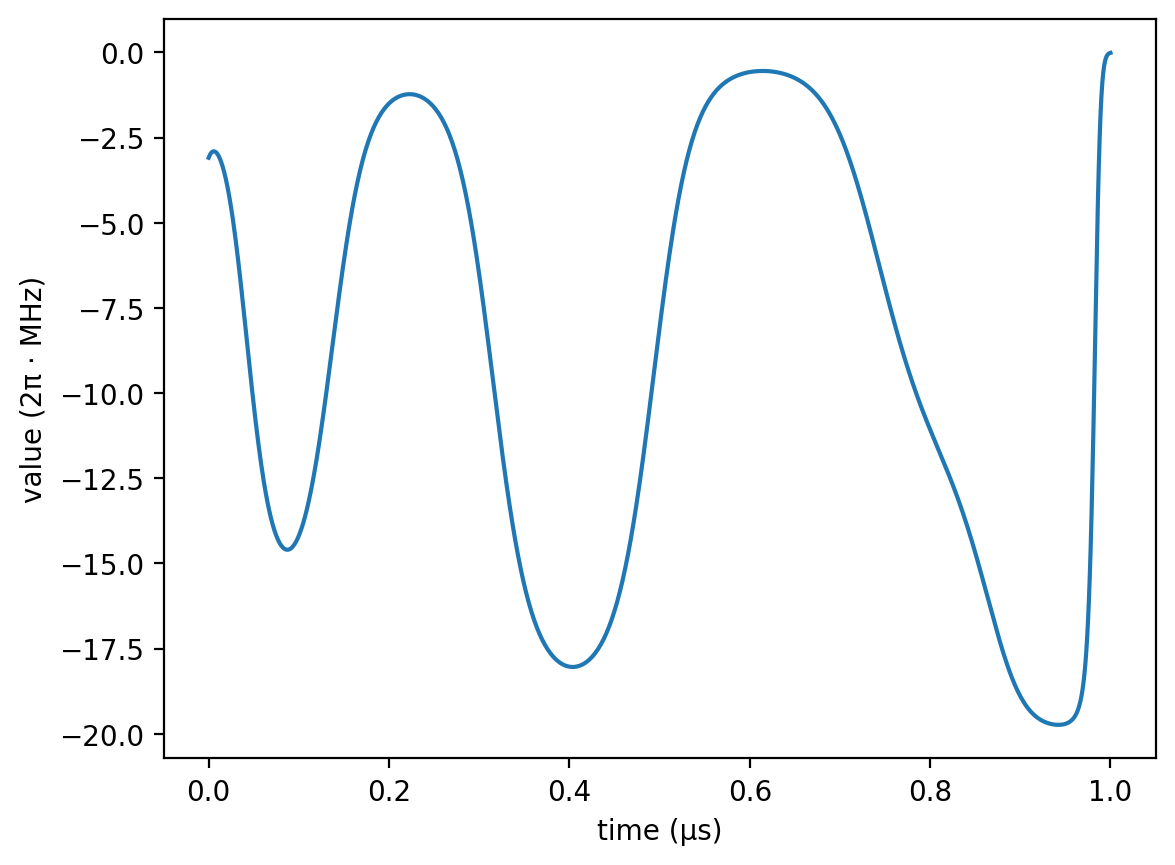

In [6]:
Bloqade.plot(generator.Δ1[1])